<a href="https://colab.research.google.com/github/Mallowsss/CCDEPLRL_COM221ML_LABASAN/blob/main/exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [ ]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


In [ ]:
# Rename columns for clarity (optional)
dataset = dataset.rename(columns={"review": "text", "rating": "sentiment"})

# Convert rating to binary sentiment (1 = positive, 0 = negative)
dataset['sentiment'] = dataset['sentiment'].apply(lambda x: 1 if x >= 3 else 0)

# Prepare data
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [ ]:
# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## 1. Tokenize the data

In [ ]:
# Tokenization setup
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

## 2. Sequence the data

In [ ]:
# answer here
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## 3. Pad the data

In [ ]:
# answer here

## 4. Train a sentiment model

In [ ]:
# answer here
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6796 - loss: 0.6690 - val_accuracy: 0.3234 - val_loss: 0.8271
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7024 - loss: 0.6232 - val_accuracy: 0.3234 - val_loss: 0.8988
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6892 - loss: 0.6257 - val_accuracy: 0.3234 - val_loss: 0.8886
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6667 - loss: 0.6315 - val_accuracy: 0.3234 - val_loss: 0.8943
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6895 - loss: 0.6170 - val_accuracy: 0.3234 - val_loss: 0.8922
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6942 - loss: 0.6113 - val_accuracy: 0.3234 - val_loss: 0.9014
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7024 - loss: 0.5938 - val_accuracy: 0.3234 - val_loss: 0.8796
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7371 - loss: 0.5635 - val_accuracy: 0.3234 - val_loss

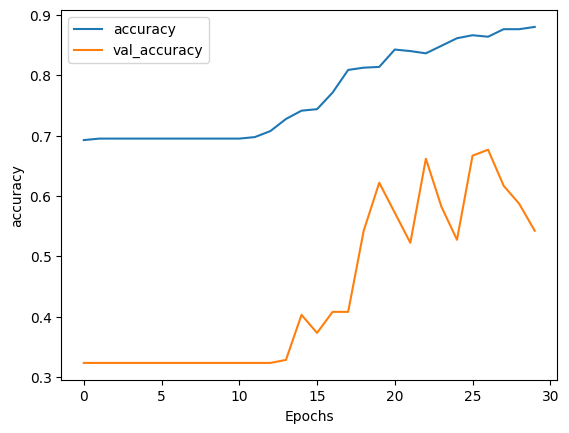

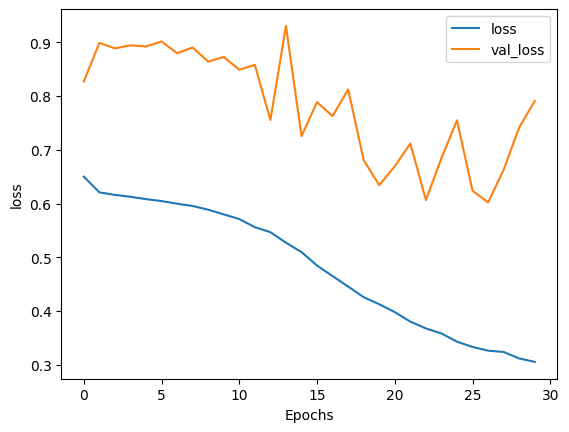

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Get files for visualing the network

In [ ]:
# answer here
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 16)


In [ ]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 5. Predict sentiment with new reviews

In [ ]:
# answer here
# Predict new reviews
fake_reviews = [
    'I love this phone',
    'I hate spaghetti',
    'Everything was cold',
    'Everything was hot exactly as I wanted',
    'Everything was green',
    'the host seated us immediately',
    'they gave us free chocolate cake',
    'not sure about the wilted flowers on the table',
    'only works when I stand on tippy toes',
    'does not work when I stand on my head'
]

sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')
classes = model.predict(fakes_padded)

for x in range(len(fake_reviews)):
    print(fake_reviews[x])
    print(f"Sentiment score: {classes[x][0]:.4f} => {'Positive' if classes[x][0] >= 0.5 else 'Negative'}\n")


HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
I love this phone
Sentiment score: 0.6870 => Positive

I hate spaghetti
Sentiment score: 0.6639 => Positive

Everything was cold
Sentiment score: 0.6819 => Positive

Everything was hot exactly as I wanted
Sentiment score: 0.6279 => Positive

Everything was green
Sentiment score: 0.6433 => Positive

the host seated us immediately
Sentiment score: 0.7770 => Positive

they gave us free chocolate cake
Sentiment score: 0.6069 => Positive

not sure about the wilted flowers on the table
Sentiment score: 0.6002 => Positive

only works when I stand on tippy toes
Sentiment score: 0.6703 => Positive

does not work when I stand on my head
Sentiment score: 0.4812 => Negative

